In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.layers import Flatten, Dense
from keras.models import Model


In [ ]:
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0

--2024-02-10 15:29:56--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2024-02-10 15:29:56--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc45cce987f4da96e308584b224b.dl.dropboxusercontent.com/cd/0/inline/CNB3o1Nczfp5EtSaLmfXAlhhTAfP83-q-GIbFbQjHVDE_0yj8ACdq3D6d1HeSvEtdkChmdhQQyTyQvFLNzOsItPkKhwPnFY469Ij-QM-TMexi35P-WqiTAJmY7OkiEzFVth99itPDMjlY4vV3lGC71MI/file# [following]
--2024-02-10 15:29:57--  https://uc45cce987f4da96e308584b224b.dl.dropboxusercontent.com/cd/0/inline/CNB3o1Nczfp5EtSaLmfXAlhhTAfP83-q-GIbFbQjHVDE_0yj8ACdq3D6d1HeSvEtdkChmdhQQyTyQvFLNzOsItPkKhwPnFY469Ij-QM-TM

In [ ]:
!unzip train.zip?dl=0

Archive:  train.zip?dl=0
  inflating: train/Happy/images (34).jpg  
  inflating: train/Happy/images (29).jpg  
  inflating: train/Neutral/images (39).jpg  
  inflating: train/Happy/images (19).jpg  
  inflating: train/Happy/images (22).jpg  
  inflating: train/Happy/images (32).jpg  
  inflating: train/Happy/images (27).jpg  
  inflating: train/Happy/images (33).jpg  
  inflating: train/Happy/images (28).jpg  
  inflating: train/Neutral/images (41).jpg  
  inflating: train/Happy/images (31).jpg  
  inflating: train/Happy/images (14).jpg  
  inflating: train/Happy/images (20).jpg  
  inflating: train/Happy/images (13).jpg  
  inflating: train/Happy/images (16).jpg  
  inflating: train/Neutral/images (42).jpg  
  inflating: train/Happy/images (21).jpg  
  inflating: train/Happy/images (24).jpg  
  inflating: train/Happy/images (35).jpg  
  inflating: train/Happy/images (18).jpg  
  inflating: train/Neutral/images (44).jpg  
  inflating: train/Happy/images (30).jpg  
  inflating: train/Ha

In [ ]:
base_model = MobileNet(input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7, activation='softmax')(x)

model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [ ]:
model.compile(optimizer='adam', loss="categorial_crossentropy", metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    rescale = 1./255
)
train_data = train_datagen.flow_from_directory(directory="/content/train",
                                               target_size=(224,224),
                                               batch_size=32)
train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1/255)

val_data = val_datagen.flow_from_directory(directory="/content/train",
                                           target_size=(224,224),
                                           batch_size=32)

Found 350 images belonging to 7 classes.


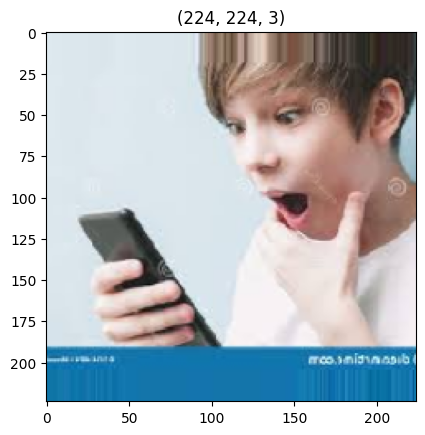

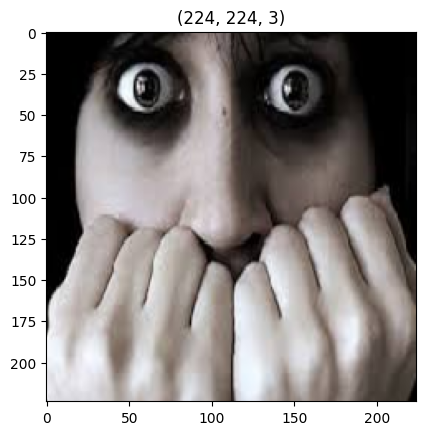

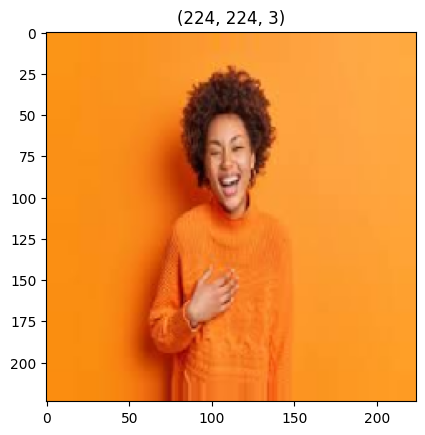

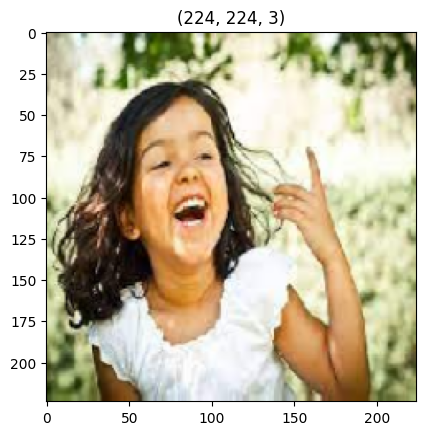

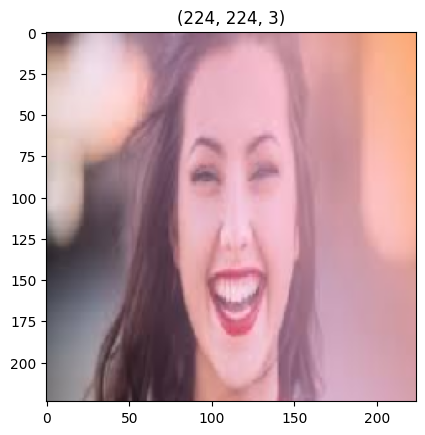

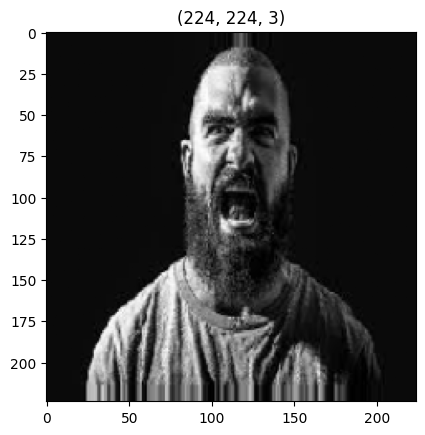

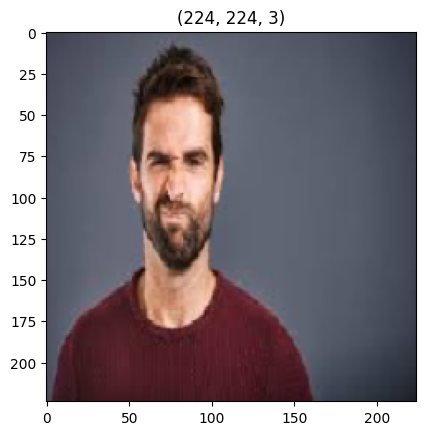

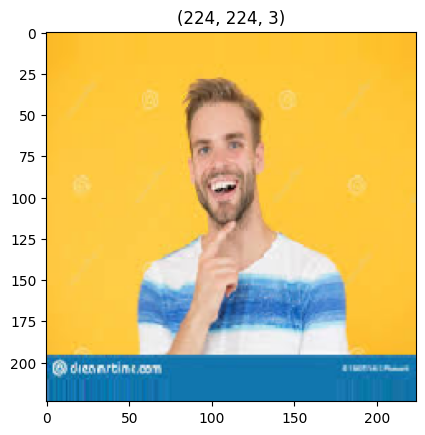

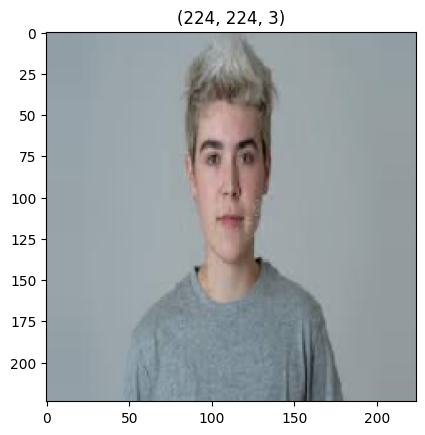

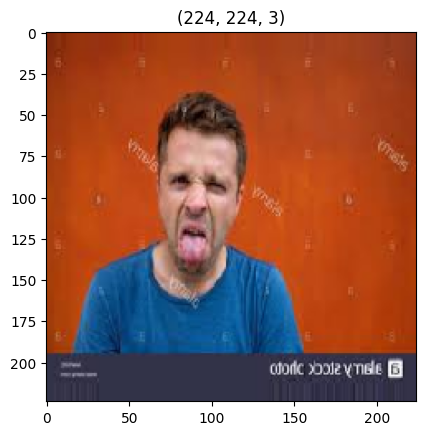

In [ ]:
t_img, label = train_data.next()

def plotImages(img_arr, label):
  """
  input :- images array
  output :- plot the images
  """

  count = 0
  for im, l in zip(img_arr, label):
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count+=1
    if count == 10:
      break

plotImages(t_img, label)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode = 'auto')

mc = ModelCheckpoint(filepath = "best_model.h5", monitor = 'val_accuracy', verbose=1, sace_best_only = True, mode = 'auto')
call_back = [es, mc]

In [ ]:
!pip install tensorflow

In [ ]:
from keras.losses import categorical_crossentropy

model.compile(loss=categorical_crossentropy, optimizer='adam', metrics=['accuracy'])


In [ ]:

hist = model.fit_generator(train_data,
                           steps_per_epoch=10,
                           epochs=30,
                           validation_data=val_data,
                           validation_steps=8,
                           callbacks=[es,mc])

<ipython-input-14-f2e4b8b14dfa>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 11.7130 - accuracy: 0.1635
Epoch 1: saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 48s 4s/step - loss: 11.7130 - accuracy: 0.1635 - val_loss: 3.7562 - val_accuracy: 0.5312
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 4.9132 - accuracy: 0.5283
Epoch 2: saving model to best_model.h5
10/10 [==============================] - 30s 3s/step - loss: 4.9132 - accuracy: 0.5283 - val_loss: 3.0235 - val_accuracy: 0.6406
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 2.1392 - accuracy: 0.6918
Epoch 3: saving model to best_model.h5
10/10 [==============================] - 32s 3s/step - loss: 2.1392 - accuracy: 0.6918 - val_loss: 1.3189 - val_accuracy: 0.7891
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 1.1800 - accuracy: 0.8176
Epoch 4: saving model to best_model.h5
10/10 [==============================] - 30s 3s/step - loss: 1.1800 - accuracy: 0.8176 - val_loss: 0.5425 - val_accuracy: 0.8828
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.5680 - accurac

In [ ]:
from keras.models import load_model
model=load_model("/content/best_model.h5")

In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

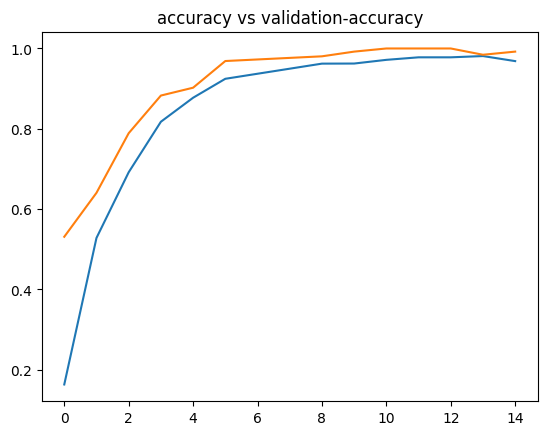

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title("accuracy vs validation-accuracy")
plt.show()

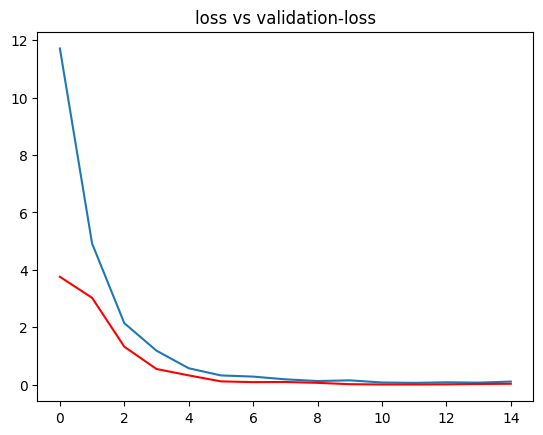

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs validation-loss")
plt.show()

In [ ]:
op = dict(zip(train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 1s 563ms/step
the image is of Fear


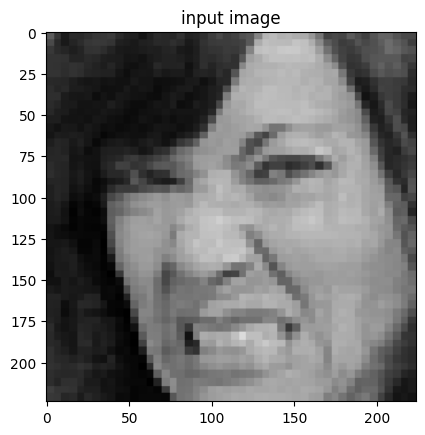

In [ ]:
path = "/content/drive/MyDrive/388.jpg"
img = load_img(path, target_size=(224,224))

i = img_to_array(img)/255
input_arr = np.array([1])
input_arr.shape
input_arr = np.expand_dims(i, axis=0)
pred = np.argmax(model.predict(input_arr))

print(f"the image is of {op[pred]}")

plt.imshow(input_arr[0])
plt.title("input image")
plt.show()